# Importing libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dataset Cleaning

In [117]:
# Reading the dataframe
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Categorical variable - Re Encoding

In [118]:
df.drop(['ID'], axis = 1, inplace = True )

In [119]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [120]:
# SEX - 1 : Male, 2: Female. Converting into binary 0: Male, 1: Female
df['SEX'] = df['SEX'].map({1:0, 2:1})

In [121]:
# Education: 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others
# So encoding 0,4,5,6 into 0
df['EDUCATION'].replace([4,5,6], [0,0,0], inplace = True)

In [122]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [123]:
# Marriage 1- single, 2 - Married, 3 - Divorced, 0-others
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [124]:
# Repayment status
#-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month;
# 2 = payment delay for two months; . . .;b
# 8 = payment delay for eight months; 9 = payment delay for nine months and above.

df.groupby('PAY_0')['default.payment.next.month'].value_counts(normalize = True)

PAY_0  default.payment.next.month
-2     0                             0.867706
       1                             0.132294
-1     0                             0.832219
       1                             0.167781
 0     0                             0.871887
       1                             0.128113
 1     0                             0.660521
       1                             0.339479
 2     1                             0.691414
       0                             0.308586
 3     1                             0.757764
       0                             0.242236
 4     1                             0.684211
       0                             0.315789
 5     0                             0.500000
       1                             0.500000
 6     1                             0.545455
       0                             0.454545
 7     1                             0.777778
       0                             0.222222
 8     1                             0.578947


Data cleaning and transformation is required for this data. Plus as the data is imbalanced, we also have to fix that so model has enough samples to learn from the data.

We will be choosing F1-score as our metric to validate the model.

In [125]:
num_variables = ['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'AGE']
cat_variables = [i for i in df.columns if i not in num_variables]

In [126]:
cat_variables.remove('default.payment.next.month')

In [127]:
cat_variables.remove('SEX')

In [128]:
for i in cat_variables:
    df[i] = df[i].astype(str)

We will one hot encode the foll variables: Pay_0 to Pay_6, SEX, MARRIAGE, EDUCATION.

In [129]:
X = df.drop(['default.payment.next.month'],axis = 1)
y = df['default.payment.next.month']
y=y.astype('int')

# Spliting the var into 85-15 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state = 100)

In [131]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = X_train[cat_variables]
X_test_cat = X_test[cat_variables]

ohe = OneHotEncoder(sparse=False, drop='first')
train_cat_vals = ohe.fit_transform(X_train_cat)
test_cat_vals = ohe.transform(X_test_cat)

tr_cat_df = pd.DataFrame(train_cat_vals, columns=ohe.get_feature_names(input_features=X_train_cat.columns))
te_cat_df = pd.DataFrame(test_cat_vals, columns=ohe.get_feature_names(input_features=X_test_cat.columns))

C:\Users\kalke\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kalke\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [132]:
X_train.reset_index(drop=True, inplace= True)
X_test.reset_index(drop=True, inplace = True)

In [133]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,110000.0,1,3,2,28,0,0,2,2,0,...,82975.0,80446.0,80006.0,80421.0,4000.0,6000.0,12.0,3100.0,3200.0,3000.0
1,50000.0,1,2,2,40,-1,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,4377.0,0.0,0.0,0.0,0.0,0.0
2,320000.0,1,1,1,39,0,0,0,0,0,...,128832.0,133329.0,53870.0,13185.0,5000.0,15000.0,5000.0,5000.0,3000.0,5000.0
3,200000.0,1,1,2,28,1,-1,3,2,2,...,344.0,344.0,0.0,0.0,344.0,0.0,0.0,0.0,0.0,250.0
4,320000.0,1,2,1,40,0,0,0,0,0,...,100704.0,208794.0,213025.0,217400.0,5000.0,2704.0,108794.0,5123.0,5255.0,5333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,180000.0,0,2,2,38,2,2,0,0,0,...,22182.0,12382.0,-18.0,-18.0,0.0,2100.0,200.0,0.0,0.0,0.0
25496,150000.0,1,1,1,34,-2,-2,-2,-2,-2,...,8796.0,20359.0,17329.0,20087.0,14539.0,8796.0,20375.0,17329.0,20087.0,0.0
25497,300000.0,0,1,2,29,-2,-2,-2,-2,-2,...,1705.0,-4.0,36581.0,332.0,4018.0,1809.0,0.0,36583.0,334.0,0.0
25498,20000.0,0,1,2,28,1,2,0,0,2,...,9097.0,10935.0,10463.0,11295.0,0.0,1200.0,2000.0,0.0,1000.0,0.0


In [134]:
X_train.drop(cat_variables, axis = 1, inplace = True)
X_test.drop(cat_variables, axis = 1, inplace = True)

X_train = pd.concat([X_train, tr_cat_df], axis = 1)
X_test = pd.concat([X_test, te_cat_df], axis = 1)

In [135]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_0_-2', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
       'PAY_5_8', 'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4',
       'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_

Now we will fit 4 models to this data: Logistic regression, Decision Trees, K Nearest neighbors and Support Vector machines.

We will treat Logistic regression as the base model

# Base Model

In [136]:
from sklearn.metrics import accuracy_score, classification_report 
def print_metrics(model):
    """This function will print the train and test accuracy, and the Test classification report"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Train Accuracy = ', accuracy_score(y_train, y_train_pred))
    print('Test Accuracy = ', accuracy_score(y_test, y_test_pred))
    print()
    print('Test classification Report: ')
    print()
    print(classification_report(y_test, y_test_pred))

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, class_weight='balanced')
lr.fit(X_train, y_train)
print_metrics(lr)

Train Accuracy =  0.5547843137254902
Test Accuracy =  0.5628888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.52      0.65      3505
           1       0.30      0.72      0.42       995

    accuracy                           0.56      4500
   macro avg       0.58      0.62      0.54      4500
weighted avg       0.74      0.56      0.60      4500



The model is not predicting the minority class since the data is imbalanced. So we will pass in class_weight parameter to the model, so the model starts treating the minority class as important.

As we see, the f1-score for the minority class jumps to 0.42. So balancing the classes had major effect on the model performance

In [138]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.9993333333333333
Test Accuracy =  0.7368888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3505
           1       0.41      0.43      0.42       995

    accuracy                           0.74      4500
   macro avg       0.62      0.63      0.62      4500
weighted avg       0.74      0.74      0.74      4500



Decision Tree is overfitting, restricting the maximum depth tree can grow to 6

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced', max_depth=6)
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.7884705882352941
Test Accuracy =  0.792

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3505
           1       0.53      0.52      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



In [140]:
# Support Vector machines
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)
print_metrics(svc)

Train Accuracy =  0.5845098039215686
Test Accuracy =  0.5731111111111111

Test classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.55      0.67      3505
           1       0.29      0.64      0.40       995

    accuracy                           0.57      4500
   macro avg       0.57      0.60      0.53      4500
weighted avg       0.72      0.57      0.61      4500



In [141]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
print_metrics(knc)

Train Accuracy =  0.8172156862745098
Test Accuracy =  0.7566666666666667

Test classification Report: 

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3505
           1       0.40      0.19      0.26       995

    accuracy                           0.76      4500
   macro avg       0.60      0.55      0.56      4500
weighted avg       0.71      0.76      0.72      4500



Observations:

1. Class imbalance has a major effect on the model performance. Giving weight to minority class improved the performance considerably

2. Distance based models (KNN and SVM) didn't give good results on this dataset. That might be because of high dimensionality and outliers present in the data

3. Decision Tree gave the best result with minority class f1-score at 0.53

# Model Training - Iteration 2

As we saw in the EDA, many of the numeric variables have skew/ are not normally distributed.

While the distribution of the data is not an issue (generally) for tree based algorithms, for statistical algos like Logistic regression perform much better with normal data. So we will be applying various transformations to check how the model behaves for each one

Also for handling the outliers, data transformation is necessary. What data transformation should do is reduce the variance in the numeric data and thus removing the negative effect of outliers

In [142]:
# Transformations : 
### Age:

def plot_transformations(variable):
    plt.figure(figsize = (15,10))
    sns.displot(df[variable])
    try:
        log_trans = np.log(df[variable]+1)
        sns.displot(log_trans)
    except:
        print('Log transformation not applicable since there are negative values present in data')
    sqrt_trans = np.sqrt(df[variable])
    sns.displot(sqrt_trans)
    
    try:
        boxcox_trans = boxcox(df[variable], lmbda = 0)
        sns.displot(boxcox_trans)
    except:
        print('Boxcox transformation not applicable since there are negative values present in data')

<Figure size 1080x720 with 0 Axes>

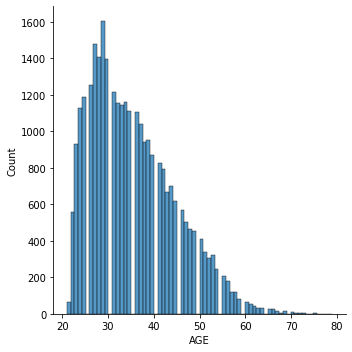

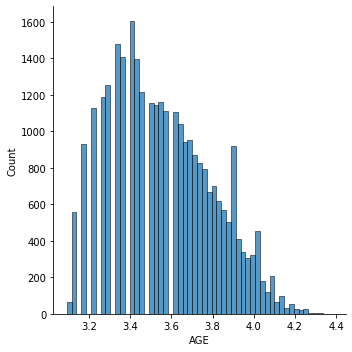

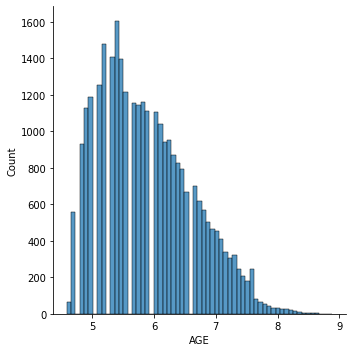

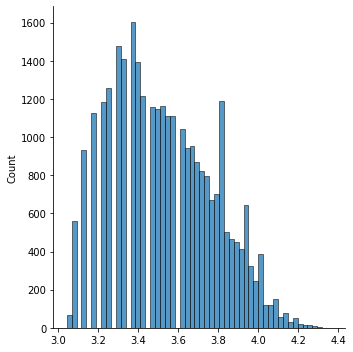

In [143]:
plot_transformations('AGE')

None of the transformations have good effect on the data distribution, so we will leave AGE as it is

<Figure size 1080x720 with 0 Axes>

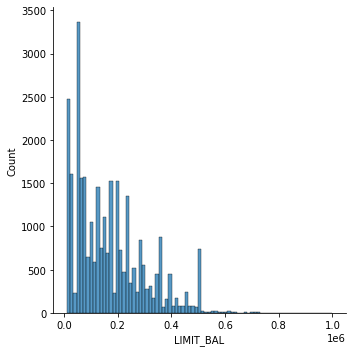

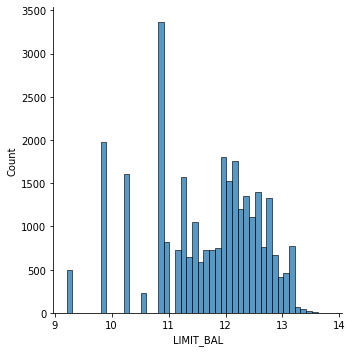

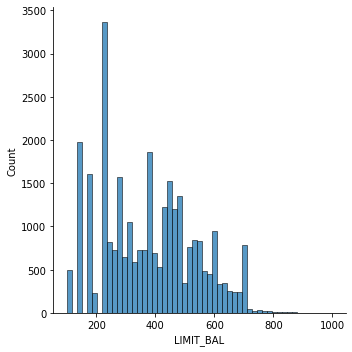

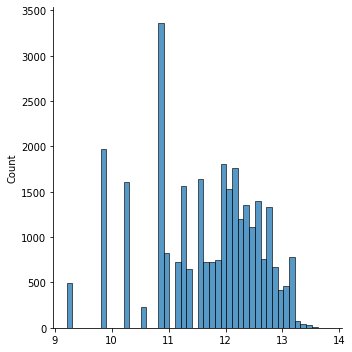

In [144]:
plot_transformations('LIMIT_BAL')

Log transformation not applicable since there are negative values present in data
Boxcox transformation not applicable since there are negative values present in data


C:\Users\kalke\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kalke\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kalke\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1080x720 with 0 Axes>

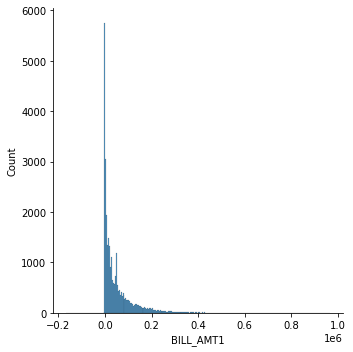

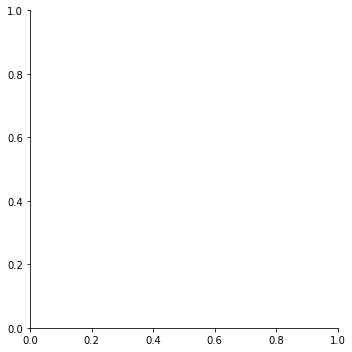

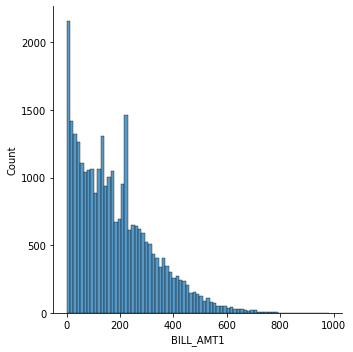

In [145]:
plot_transformations('BILL_AMT1')

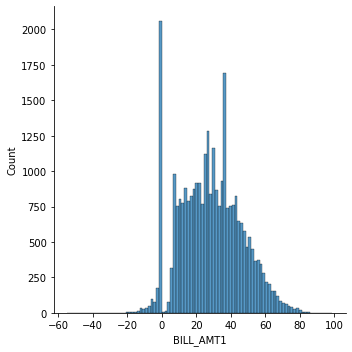

In [146]:
bill_amt = np.cbrt(df['BILL_AMT1'])
sns.displot(bill_amt)

There are negative values present in the data, so applying cuberoot transformation makes sense. While the transformation doesnt make the data completely normal, the data is now well distributed and centered with a little left skew

Boxcox transformation not applicable since there are negative values present in data


<Figure size 1080x720 with 0 Axes>

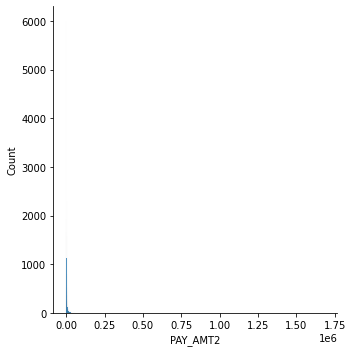

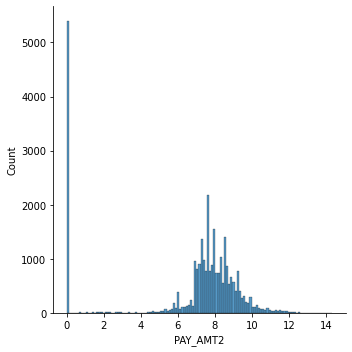

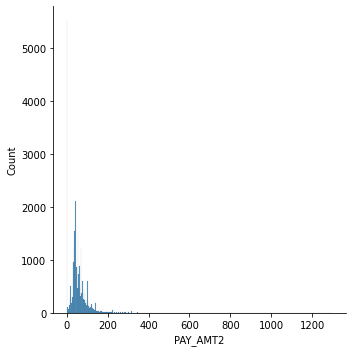

In [147]:
plot_transformations('PAY_AMT2')

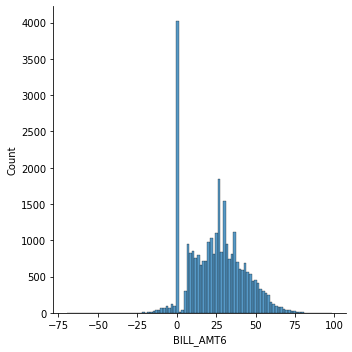

In [148]:
pay_amt = np.cbrt(df['BILL_AMT6'])
sns.displot(pay_amt)

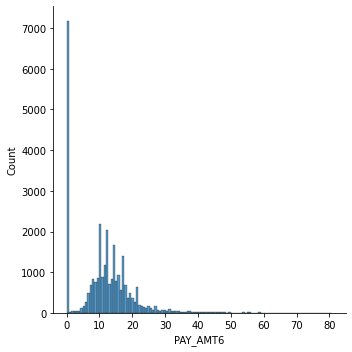

In [149]:
pay_amt = np.cbrt(df['PAY_AMT6'])
sns.displot(pay_amt)

For Pay amount too, cuberoot transformation works well, so we will be applying cuberoot transformation to both Bill Amt and Pay Amt

We can see various outliers in the data, so data transformation is not working well, so we will be applying the transformation to the dataset where outliers were removed

In [150]:
X_train_cp = X_train.copy()
X_test_cp = X_test.copy()

In [151]:
#Applying cuberoot transformation
X_train[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = np.cbrt(X_train[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
#Applying cuberoot transformation
X_test[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = np.cbrt(X_test[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])

In [152]:
X_train[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=np.cbrt(X_train[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
X_test[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=np.cbrt(X_test[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

In [153]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.7884705882352941
Test Accuracy =  0.7917777777777778

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3505
           1       0.53      0.52      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



The data transformation has no effect on the decision tree model performance, but for Logistic regression, the model performance falls to 0
Now we will be looking at feature importance, look at the features deemed important by the model and maybe removing the feature considered not important by the model

# Feature Importance

In [155]:
coef = lr.coef_[0]
idx_sorted = np.argsort(coef)[::-1]
for i in idx_sorted:
    print(X_train.columns[i], " : ", coef[i])

AGE  :  3.9220035145990105e-10
BILL_AMT6  :  2.643840434975819e-10
BILL_AMT4  :  2.554925214930947e-10
BILL_AMT5  :  2.522195933464753e-10
BILL_AMT3  :  2.5060562485538844e-10
BILL_AMT2  :  2.4750131187077196e-10
BILL_AMT1  :  2.2354711601275687e-10
PAY_2_2  :  2.1303126661126575e-11
PAY_0_2  :  2.0305358420560015e-11
PAY_3_2  :  1.8036510347240658e-11
PAY_4_2  :  1.5141991069762055e-11
PAY_5_2  :  1.3635007169304842e-11
PAY_6_2  :  1.2803236279235703e-11
MARRIAGE_1  :  7.923523251833415e-12
PAY_0_1  :  7.814978643491837e-12
EDUCATION_2  :  7.442661222572428e-12
EDUCATION_3  :  3.699449137517311e-12
PAY_0_3  :  2.7920278297743493e-12
PAY_2_3  :  2.103487339588909e-12
SEX  :  1.919459805722922e-12
MARRIAGE_2  :  1.7655278992807746e-12
PAY_3_3  :  1.3034462379367008e-12
PAY_4_3  :  1.1230272126176922e-12
PAY_5_3  :  1.0931607803564632e-12
PAY_6_3  :  1.0374597218689256e-12
PAY_4_7  :  5.912640897362139e-13
PAY_5_7  :  5.9122632838959e-13
PAY_0_4  :  5.478667499912592e-13
PAY_4_4  :  5.05

In [156]:
feat_imp = dtc.feature_importances_
idx = np.argsort(feat_imp)[::-1]
for i in idx:
    print(X_train.columns[i], " : ", feat_imp[i])

PAY_0_2  :  0.49053299005145445
PAY_2_2  :  0.2023456959258474
PAY_AMT2  :  0.1158768436647667
PAY_4_2  :  0.04045854143496178
LIMIT_BAL  :  0.030191703967468227
PAY_2_3  :  0.0280237164692501
PAY_AMT4  :  0.020118650366806913
BILL_AMT1  :  0.014384191446962555
PAY_0_3  :  0.011561754520581613
PAY_6_-2  :  0.009646105756971826
PAY_0_1  :  0.008310590397919267
PAY_5_2  :  0.005671940402011425
PAY_AMT5  :  0.005184105728801421
AGE  :  0.002695652722630206
PAY_AMT3  :  0.002595053607099976
PAY_AMT6  :  0.0022240358113594233
BILL_AMT3  :  0.0019000864065391366
BILL_AMT6  :  0.0018637568138341262
BILL_AMT4  :  0.0015536911163494674
BILL_AMT2  :  0.0014442069363154466
PAY_6_0  :  0.0011582629259759118
SEX  :  0.000893571607674933
PAY_4_0  :  0.0007347501145136822
MARRIAGE_3  :  0.0006301018039039421
EDUCATION_2  :  0.0
PAY_0_5  :  0.0
PAY_2_1  :  0.0
PAY_2_0  :  0.0
PAY_2_-2  :  0.0
PAY_0_8  :  0.0
PAY_0_7  :  0.0
PAY_0_6  :  0.0
EDUCATION_1  :  0.0
PAY_0_4  :  0.0
PAY_2_4  :  0.0
BILL_AMT5 

From the above scores, we can see : Pay flags, Pay Amount, Limit Balance, Bill Amount, Age, are important for the model to predict, while SEX, MARRIAGE, EDUCATION seems not to be that important

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

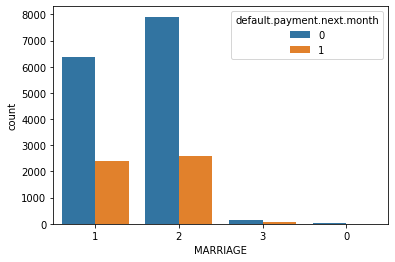

In [170]:
sns.countplot(x = 'MARRIAGE', data = df_outliers_removed, hue = 'default.payment.next.month')

<AxesSubplot:xlabel='SEX', ylabel='count'>

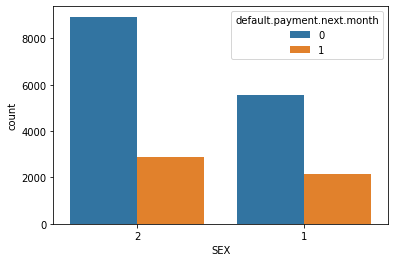

In [171]:
sns.countplot(x = 'SEX', data = df_outliers_removed, hue = 'default.payment.next.month')

<AxesSubplot:xlabel='SEX', ylabel='count'>

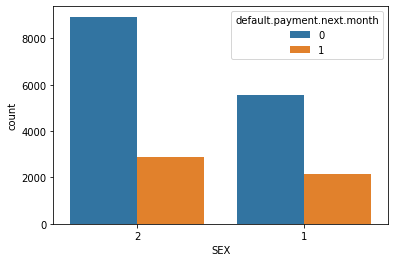

In [172]:
sns.countplot(x = 'SEX', data = df_outliers_removed, hue = 'default.payment.next.month')

So we can see from the above visualization as well as from the model feature importance, SEX, MARRIAGE are not relevant in predicting the target. But eduction does makes sense as higher the education, better is the job and chances of paying back the credit card bill.

So we will be removing SEX and MARRIAGE for now, and come back to education

In [170]:
X_train = X_train_cp.copy()
X_test = X_test_cp.copy()

In [171]:
remove_vars = [i for i in X_train.columns if i.startswith('MARRIAGE')]
remove_vars.append('SEX')
X_train.drop(remove_vars, axis = 1, inplace = True)
X_test.drop(remove_vars, axis=1, inplace = True)

In [172]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1500)                        # Since we have imbalance in the dataset
lr.fit(X_train.values, y_train)
print_metrics(lr)

Train Accuracy =  0.5546666666666666
Test Accuracy =  0.5631111111111111

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.52      0.65      3505
           1       0.30      0.72      0.42       995

    accuracy                           0.56      4500
   macro avg       0.58      0.62      0.54      4500
weighted avg       0.74      0.56      0.60      4500



C:\Users\kalke\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kalke\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [174]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.7881176470588235
Test Accuracy =  0.7915555555555556

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3505
           1       0.53      0.52      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



Even after dropping SEX and MARRIAGE, there is no change in metrics. So we can say the variables were not influencing the prediction

In [179]:
feat_imp = dtc.feature_importances_
idx = np.argsort(feat_imp)[::-1]
for i in idx:
    print(X_train.columns[i], " : ", feat_imp[i])

PAY_0_2  :  0.45799045762777363
PAY_2_2  :  0.21138253572305518
PAY_AMT2  :  0.08342538584504879
PAY_4_2  :  0.08029396003485297
LIMIT_BAL  :  0.04157772868916631
BILL_AMT2  :  0.0319736652712207
PAY_AMT1  :  0.02377329967363047
PAY_0_3  :  0.015292175639732052
BILL_AMT1  :  0.007324228110352653
BILL_AMT4  :  0.006318781962458263
PAY_2_3  :  0.006136441451123524
BILL_AMT5  :  0.005293038520256931
PAY_AMT6  :  0.004602352278796815
PAY_0_0  :  0.004091098052517472
BILL_AMT3  :  0.004065092814887396
PAY_6_2  :  0.003809048850094984
AGE  :  0.002450183428439397
PAY_AMT4  :  0.0018960910774811636
PAY_3_2  :  0.0018203141510724538
EDUCATION_6  :  0.001624484949378223
PAY_AMT5  :  0.0014746876938271315
PAY_5_2  :  0.0014049593943122594
PAY_4_0  :  0.001304594916555244
PAY_5_0  :  0.000675393843965903
EDUCATION_2  :  0.0
BILL_AMT6  :  0.0
PAY_2_1  :  0.0
PAY_2_0  :  0.0
PAY_2_-2  :  0.0
PAY_0_8  :  0.0
PAY_0_7  :  0.0
PAY_0_6  :  0.0
PAY_AMT3  :  0.0
PAY_0_5  :  0.0
PAY_0_4  :  0.0
EDUCATION_4

# Scaling the features.

Since the features are not in the same scale, it might cause the model to assign unequal weights to the features. For ex: Limit_bal and Pay_0 have very different scales. So we will scale the features using standard scalar, which will bring all the variables to same scale having mean 0 and std-dev 1.

Again scaling will benefit the logistic regression model, but wont have much effect on Decision trees

In [175]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc =  ss.fit_transform(X_test)

In [176]:
from sklearn.metrics import accuracy_score, classification_report 
def print_metrics_sc(model):
    """This function will print the Scaled train and test accuracy, and the Test classification report"""
    y_train_pred = model.predict(X_train_sc)
    y_test_pred = model.predict(X_test_sc)
    print('Train Accuracy = ', accuracy_score(y_train, y_train_pred))
    print('Test Accuracy = ', accuracy_score(y_test, y_test_pred))
    print()
    print('Test classification Report: ')
    print()
    print(classification_report(y_test, y_test_pred))

In [177]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')                        # Since we have imbalance in the dataset
lr.fit(X_train_sc, y_train)
print_metrics_sc(lr)

Train Accuracy =  0.7783529411764706
Test Accuracy =  0.7837777777777778

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3505
           1       0.51      0.58      0.54       995

    accuracy                           0.78      4500
   macro avg       0.69      0.71      0.70      4500
weighted avg       0.80      0.78      0.79      4500



We can see sudden increase in the f1-score for logistic regression since regression works well when the features are on same scale

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtc.fit(X_train_sc, y_train)
print_metrics_sc(dtc)

Train Accuracy =  0.7881176470588235
Test Accuracy =  0.7868888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3505
           1       0.52      0.50      0.51       995

    accuracy                           0.79      4500
   macro avg       0.69      0.68      0.69      4500
weighted avg       0.78      0.79      0.79      4500



There is not much change in Decision Trees as they do not much affected by the scale of the features. But we can see immediate increase in the f1-score of logistic regression, which is very much affected by the scale 

# Hyperparameter tuning Logistic regression & Decision Trees

In [179]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [180]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr = LogisticRegression(max_iter = 1500, class_weight='balanced')
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='f1')
grid_result = grid_search.fit(X_train_sc, y_train)

In [181]:
lr_best = grid_search.best_estimator_
print_metrics_sc(lr_best)

Train Accuracy =  0.779607843137255
Test Accuracy =  0.7853333333333333

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3505
           1       0.51      0.58      0.54       995

    accuracy                           0.79      4500
   macro avg       0.69      0.71      0.70      4500
weighted avg       0.80      0.79      0.79      4500



In [210]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [182]:
params = {
    'max_depth': [2, 3, 4, 5, 6, 10, 12, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dtc = DecisionTreeClassifier(class_weight='balanced')
grid_search_dt = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "f1")
grid_search_dt.fit(X_train, y_train)

Fitting 15 folds for each of 80 candidates, totalling 1200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [183]:
grid_search_dt.best_score_

0.5108501722331399

In [184]:
dtc_best = grid_search_dt.best_estimator_
print_metrics(dtc_best)

Train Accuracy =  0.783843137254902
Test Accuracy =  0.7902222222222223

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3505
           1       0.53      0.53      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



# Trying advance algorithms

1. Random Forest (Bagging algo)
2. XGBoost (Boosting algo)


In [185]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, class_weight='balanced')
rfc.fit(X_train, y_train)
print_metrics(rfc)

Train Accuracy =  0.7769019607843137
Test Accuracy =  0.7822222222222223

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      3505
           1       0.51      0.61      0.55       995

    accuracy                           0.78      4500
   macro avg       0.69      0.72      0.70      4500
weighted avg       0.80      0.78      0.79      4500



In [186]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth = 6, scale_pos_weight= 3)
xgbc.fit(X_train.values, y_train)
print_metrics(xgbc)

Train Accuracy =  0.866313725490196
Test Accuracy =  0.7835555555555556

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3505
           1       0.51      0.58      0.54       995

    accuracy                           0.78      4500
   macro avg       0.69      0.71      0.70      4500
weighted avg       0.79      0.78      0.79      4500



So we get the best f1-score for positive class using XGBoost classifier, and also good accuracy while prediction. So we will be selecting this model moving forward

<AxesSubplot:>

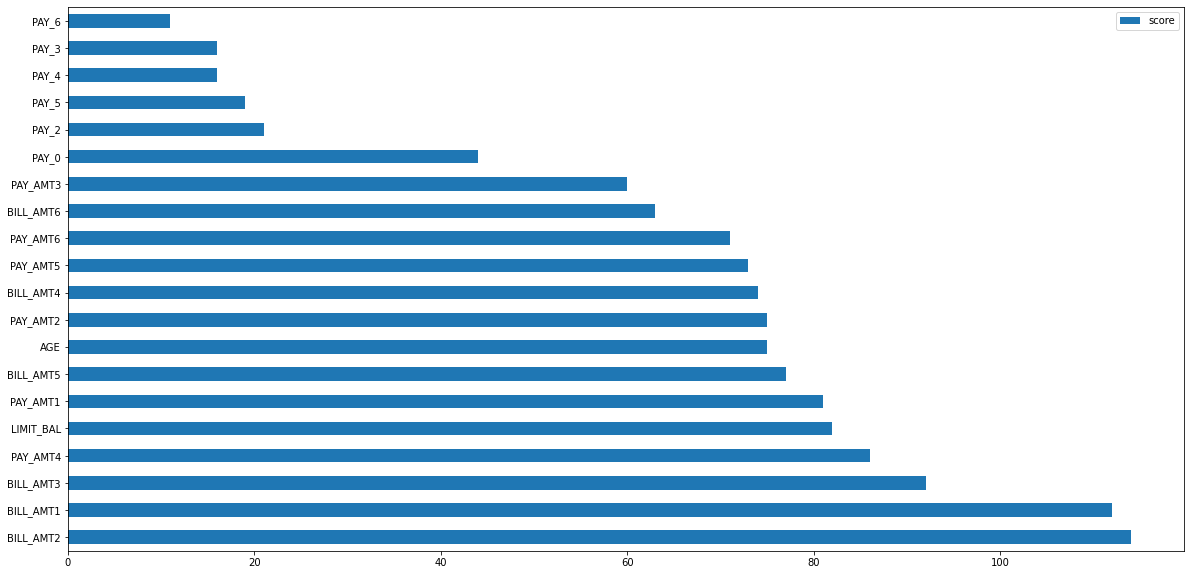

In [79]:
feature_imp = xgbc.get_booster().get_score(importance_type='weight')
keys = X_train.columns
values = feature_imp.values()

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [187]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'scale_pos_weight' : [2, 2.5, 3]
}

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)

xgbc = XGBClassifier()
gs2 = GridSearchCV(xgbc, params, n_jobs=-1, cv=cv, scoring='f1', verbose = 2)
gs2.fit(X_train.values, y_train)

print('Best score:', gs2.best_score_)
print('Best params:', gs2.best_params_)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
Best score: 0.5423106676981353
Best params: {'booster': 'gbtree', 'learning_rate': 0.05, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 5, 'scale_pos_weight': 3}


In [188]:
xgbc_best = gs2.best_estimator_
print_metrics(xgbc_best)

Train Accuracy =  0.8014509803921569
Test Accuracy =  0.7935555555555556

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      3505
           1       0.53      0.59      0.56       995

    accuracy                           0.79      4500
   macro avg       0.70      0.72      0.71      4500
weighted avg       0.80      0.79      0.80      4500



# Imbalance Handling

Imbalance in dataset will have negative effect on the model, where the model will overfit on the majority class and fail to give good results for minority class.

There are various ways to handle class imbalance. We will be trying 2 methods:

1. Random Oversampling -  In this method, the minority class will be sampled with replacement till the number of samples for both minority and majority classes become same.
   
2. SMOTE - Here, synthetic copies of the minority class instance will be produced using K nearest neighbors classifiers


In [221]:
# Random Over Sampling:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_train_resampled, y_train_resampled= ros.fit_resample(X_train, y_train)

In [222]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(booster =  'gbtree', 
                     learning_rate =  0.01, n_estimators =  200, reg_alpha= 0.5,
                     reg_lambda= 5)                                 # We removed the extra weight on positive class
xgbc.fit(X_train_resampled, y_train_resampled)
print_metrics(xgbc)

Train Accuracy =  0.7659945832079447
Test Accuracy =  0.760654619843164

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2176
           1       0.53      0.63      0.57       757

    accuracy                           0.76      2933
   macro avg       0.70      0.72      0.70      2933
weighted avg       0.78      0.76      0.77      2933



This did increase the f1-score, but by just 1%

In [223]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_resampled, y_train_resampled= smote.fit_resample(X_train, y_train)

In [224]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(booster =  'gbtree', 
                     learning_rate =  0.01, n_estimators =  200, reg_alpha= 0.5,
                     reg_lambda= 5)
xgbc.fit(X_train_resampled, y_train_resampled)
print_metrics(xgbc)

Train Accuracy =  0.7483599157387902
Test Accuracy =  0.733037845209683

Test classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2176
           1       0.49      0.62      0.54       757

    accuracy                           0.73      2933
   macro avg       0.67      0.69      0.68      2933
weighted avg       0.76      0.73      0.74      2933



SMOTE reduced the metrics, so wont be using this method

# Final Model.
After comparing with all the models, we can conclude that XGBoost classifier gives the best results.

So we will be using XGBoost classifier with the foll params:
'booster': 'gbtree', 'learning_rate': 0.01,
'n_estimators': 200, 'reg_alpha': 0.5,
'reg_lambda': 5, 'scale_pos_weight': 3

The columns to be considered:
LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

The foll transformations to be applied:
cuberoot transformation to all BILL_AMT and PAY_AMT columns

The foll columns need to be one hot encoded : Pay flags 0-6

After all the above process was done, for training the model, we randomly sampled the minority class and were able to get final f1-score of 0.57